In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy import constants as const
from astropy import units as u

c = const.c.value
G = const.G.value
AU = (1*u.au).to('m').value
M_sun = const.M_sun.value
M_earth = const.M_earth.value

### Basic utility functions

In [2]:
def rel_len(x_1, x_2):
    r_vec = x_1 - x_2
    r = np.linalg.norm(r_vec)
    return r

def findrCM(x_1, x_2, m_1, m_2):
    M = m_1 + m_2
    r_cm = (m_1*x_1 + m_2*x_2)/M
    return r_cm

def γ(v, DL):
    if DL == True:
        c = 1
    else:
        c = const.c.value
    return 1/np.sqrt(1 - np.dot(v,v)/c**2)

### Acceleration equation and integration functions

In [3]:
def accelerationPM(x_1, x_2, v_1, v_2, m_1, m_2, DL):
    if DL == True:
        G, c = 1, 1
    else:
        c = const.c.value
        G = const.G.value
    
    r = rel_len(x_1, x_2)
    r_vec = x_1 - x_2

    γ_1 = γ(v_1, DL)
    γ_2 = γ(v_2, DL)

    p_1 = γ_1*m_1*v_1
    p_2 = γ_2*m_2*v_2


    E_1 = np.sqrt((m_1*c**2)**2 + (p_1*c)**2)
    E_2 = np.sqrt((m_2*c**2)**2 + (p_2*c)**2)

    c_1 = -2*(c**2 - np.dot(p_1, p_2)/(γ_1*γ_2*m_1*m_2))**2 + (c**2 - np.dot(p_1, p_1)/(γ_1*m_1)**2)*(c**2 - np.dot(p_2, p_2)/(γ_2*m_2)**2)
    dc_1dp_1 = 4*p_2/(γ_1*γ_2*m_1*m_2)*(c**2 - np.dot(p_1, p_2)/(γ_1*γ_2*m_1*m_2)) - 2*p_1/(γ_1*m_1)**2*(c**2 - np.dot(p_2, p_2)/(γ_2*m_2)**2)
    dc_1dp_2 = 4*p_1/(γ_1*γ_2*m_1*m_2)*(c**2 - np.dot(p_1, p_2)/(γ_1*γ_2*m_1*m_2)) - 2*p_2/(γ_2*m_2)**2*(c**2 - np.dot(p_1, p_1)/(γ_1*m_1)**2)
    # ξ = E_1*E_2/(E_1 + E_2)**2


    p_dot_1 =  G*(m_1*m_2)**2*c_1*r_vec/(E_1*E_2*r**3)
    p_dot_2 = -G*(m_1*m_2)**2*c_1*r_vec/(E_1*E_2*r**3)

    c_1_dot = 4*(c**2 - np.dot(p_1, p_2)/(γ_1*γ_2*m_1*m_2))*(np.dot(p_dot_1, p_2) + np.dot(p_1, p_dot_2))/(γ_1*γ_2*m_1*m_2) - 2*( np.dot(p_1, p_dot_1)/(γ_1*m_1)**2*(c**2 - np.dot(p_2, p_2)/(γ_2*m_2)**2) + np.dot(p_2, p_dot_2)/(γ_2*m_2)**2*(c**2 - np.dot(p_1, p_1)/(γ_1*m_1)**2) )
    dc_1dp_1_dot = 4*p_dot_2/(γ_1*γ_2*m_1*m_2)*(c**2 - np.dot(p_1, p_2)/(γ_1*γ_2*m_1*m_2)) + 4*p_2/(γ_1*γ_2*m_1*m_2)**2*(np.dot(p_dot_1, p_2) + np.dot(p_1, p_dot_2))/(γ_1*γ_2) - 2*p_dot_1/(γ_1*m_1)**2*(c**2 - np.dot(p_2, p_2)/(γ_2*m_2)**2) + 4*p_1*np.dot(p_2, p_dot_2)/(γ_1*γ_2*m_1*m_2)**2
    dc_1dp_2_dot = 4*p_dot_1/(γ_1*γ_2*m_1*m_2)*(c**2 - np.dot(p_1, p_2)/(γ_1*γ_2*m_1*m_2)) + 4*p_1/(γ_1*γ_2*m_1*m_2)**2*(np.dot(p_dot_1, p_2) + np.dot(p_1, p_dot_2))/(γ_1*γ_2) - 2*p_dot_2/(γ_2*m_2)**2*(c**2 - np.dot(p_1, p_1)/(γ_1*m_1)**2) + 4*p_2*np.dot(p_1, p_dot_1)/(γ_1*γ_2*m_1*m_2)**2
    E_dot_1 = np.dot(p_1, p_dot_1)*c**2/E_1
    E_dot_2 = np.dot(p_2, p_dot_2)*c**2/E_2
    q_dot_1 = p_1/E_1*c**2 + G*(m_1*m_2)**2/r*( -(p_1/E_1*E_2)/(E_1*E_2)**2*c_1*c**2 + dc_1dp_1/(E_1*E_2) )
    q_dot_2 = p_2/E_2*c**2 + G*(m_1*m_2)**2/r*( -(p_2/E_2*E_1)/(E_1*E_2)**2*c_1*c**2 + dc_1dp_2/(E_1*E_2) )
    # v_1 = q_dot_1
    # v_2 = q_dot_2

    r_dot = (r_vec[0]*(v_1[0] - v_2[0]) + r_vec[1]*(v_1[1] - v_2[1]))/r

    # V2PM_p_1 = -G**2/(r*E_1*E_2)**2*( ( 3/4*(m_1**2*m_2**2 - 5*fourdot(P_1, P_2)**2)*(m_1 + m_2)/c**2 + c_1*(E_1 + E_2)/(E_1*E_2)*(c_1*(ξ-1)/(2*(E_1*E_2)) - 4*fourdot(P_1, P_2)/c**2) )*E_2*p_1/E_1*c**2 + E_1*E_2*( 30/4*fourdot(P_1, P_2)*(E_2/E_1*p_1 - p_2)*(m_1 + m_2)/c**2 + ( 4*fourdot(P_1, P_2)*(E_2/E_1*p_1 - p_2)*(E_1 + E_2)/(E_1*E_2) - c_1*p_1/(E_1*E_2*E_1)*c**2 + c_1*(E_1 + E_2)/(E_1*E_2)**2*p_1*c**2 )*(c_1*(ξ-1)/(2*(E_1*E_2)) - 4*fourdot(P_1, P_2)/c**2) + c_1*(E_1 + E_2)(E_1*E_2)*( (4*fourdot(P_1, P_2)*(E_2/E_1*p_1 - p_2)*(ξ - 1) - c_1*p_1/(E_1*(E_1 + E_2)**3)*c**2*(E_2*(E_1 + E_2) - 2*E_1*E_2) )/(2*E_1*E_2) + c_1*(ξ-1)/(E_1*E_2)**2*E_2/E_1*p_1*c**2 + 4*((E_2/E_1*p_1) - p_2)/c**2 ) ) ) 
    

    a_1 = p_dot_1/E_1*c**2 - p_1/E_1**2*E_dot_1*c**2 - G*(m_1*m_2)**2/(E_1**2*E_2**2*r)*( r_dot/r*( E_2/E_1*p_1*c_1*c**2 + E_1*E_2*dc_1dp_1 ) + c_1*( E_dot_2*p_1/E_1 + E_2*( p_dot_1/E_1 - p_1/E_1**2*E_dot_1 ) )*c**2 + p_1/E_1*E_2*( c_1_dot - 4*c_1*( E_dot_1*E_2 + E_1*E_dot_2 ) )*c**2 - dc_1dp_1_dot*E_1*E_2 + ( E_dot_1*E_2 + E_1*E_dot_2 )*dc_1dp_1 )
    a_2 = p_dot_2/E_2*c**2 - p_2/E_2**2*E_dot_2*c**2 - G*(m_1*m_2)**2/(E_1**2*E_2**2*r)*( r_dot/r*( E_1/E_2*p_2*c_1*c**2 + E_1*E_2*dc_1dp_2 ) + c_1*( E_dot_1*p_2/E_2 + E_1*( p_dot_2/E_2 - p_2/E_2**2*E_dot_2 ) )*c**2 + p_2/E_2*E_1*( c_1_dot - 4*c_1*( E_dot_1*E_2 + E_1*E_dot_2 ) )*c**2 - dc_1dp_2_dot*E_1*E_2 + ( E_dot_1*E_2 + E_1*E_dot_2 )*dc_1dp_2 )
    return np.array([a_1, a_2])

def boost(v_1, v_2, a_1, a_2, dt):
    v_1 += a_1*dt
    v_2 += a_2*dt
    return np.array([v_1, v_2])

def move(x_1, x_2, v_1, v_2, dt):
    x_1 += v_1*dt
    x_2 += v_2*dt
    return np.array([x_1, x_2])

### This runs the simulation

In [4]:
def run_model(s, t_max, dt, DL = False):
    if DL == True:
        G, c = 1, 1
    else:
        c = const.c.value
        G = const.G.value
    
    x_1, x_2, v_1, v_2, m_1, m_2 = s
    
    R_S = 2*(m_1 + m_2)*G/c**2

    pos1 = np.zeros((2, int(t_max/dt)))
    pos2 = np.zeros((2, int(t_max/dt)))
    pos_CM = np.zeros((2, int(t_max/dt)))

    r_init = rel_len(x_1, x_2)

    for i in range(int(t_max/dt)):
        if rel_len(x_1, x_2) <= 5*R_S:
            print('Code interrupted: Radial Dip')
            pos1, pos2, pos_CM = pos1[:,0:i], pos2[:,0:i], pos_CM[:,0:i]
            break
        elif rel_len(x_1, x_2) >= 5*r_init:
            print('Code interrupted: Max distance')
            pos1, pos2, pos_CM = pos1[:,0:i], pos2[:,0:i], pos_CM[:,0:i]
            break

        pos1[:,i] = x_1
        pos2[:,i] = x_2
        pos_CM[:,i] = findrCM(x_1, x_2, m_1, m_2)


        a_1, a_2 = accelerationPM(x_1, x_2, v_1, v_2, m_1, m_2, DL)
        v_1, v_2 = boost(v_1, v_2, a_1, a_2, dt)
        x_1, x_2 = move(x_1, x_2, v_1, v_2, dt)

    positions = np.array([pos1, pos2, pos_CM])
    return positions

### Plotting functions

In [8]:
def findMaxPos(pos):
    xmax, xmin, ymax, ymin = max(pos[0]), min(pos[0]), max(pos[1]), min(pos[1])
    return xmax, xmin, ymax, ymin

def plotLims(pos):
    start_pos = np.array([pos[0][0], pos[1][0]])
    end_pos = np.array([pos[0][-1], pos[1][-1]])

    xmax, xmin, ymax, ymin = findMaxPos(pos)
    max_pos = max(max(abs(start_pos)),max(abs(end_pos)))

    xlim = (xmin-0.1*max_pos, xmax+0.1*max_pos)
    ylim = (ymin-0.1*max_pos, ymax+0.1*max_pos)
    return xlim, ylim

def plotLimsTwoBody(pos1, pos2):
    start_pos1 = np.array([pos1[0][0], pos1[1][0]])
    end_pos1 = np.array([pos1[0][-1], pos1[1][-1]])
    start_pos2 = np.array([pos2[0][0], pos2[1][0]])
    end_pos2 = np.array([pos2[0][-1], pos2[1][-1]])

    x1max, x1min, y1max, y1min = findMaxPos(pos1)
    x2max, x2min, y2max, y2min = findMaxPos(pos2)

    xmax = max(x1max, x2max)
    xmin = min(x1min, x2min)
    ymax = max(y1max, y2max)
    ymin = min(y1min, y2min)

    max_pos1 = max(max(abs(start_pos1)),max(abs(end_pos1)))
    max_pos2 = max(max(abs(start_pos2)),max(abs(end_pos2)))
    max_pos = max(max_pos1, max_pos2)

    xlim = (xmin-0.1*max_pos, xmax+0.1*max_pos)
    ylim = (ymin-0.1*max_pos, ymax+0.1*max_pos)
    return xlim, ylim

def orbPlotter(positions, positionsN = 0, xlim = 0, ylim = 0, slice = slice(0, -1, 1), aspect = 1, filename='', CM = True, save = False, show = True, DL = False, N = False, figsize=(8,8)):
    if DL == False:
        x_1, x_2, x_cm = positions[0:3,:,slice]/149597871000
    else:
        x_1, x_2, x_cm = positions[0:3,:,slice]
    if CM == True:
        x_1 = x_1 - x_cm
        x_2 = x_2 - x_cm
        x_cm = np.zeros_like(x_1)

    fig, ax = plt.subplots(figsize=figsize)
    if type(xlim) != tuple:
        xlim = plotLimsTwoBody(x_1, x_2)[0]
    if type(ylim) != tuple:
        ylim = plotLimsTwoBody(x_1, x_2)[1]
    
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

    if type(positionsN) == np.ndarray:
        if DL == False:
            x_1N, x_2N, x_cmN = positionsN[0:3,:,slice]/149597871000
        else:
            x_1N, x_2N, x_cmN = positionsN[0:3,:,slice]
        if CM == True:
            x_1N = x_1N - x_cmN
            x_2N = x_2N - x_cmN
        ax.plot(x_1N[0], x_1N[1], 'y', lw=0.5, label='Newtonian motion')
        ax.plot(x_2N[0], x_2N[1], 'y', lw=0.5, label='Newtonian motion')

    if CM == False:
        ax.plot(x_cm[0], x_cm[1], 'g:',label = 'CM')
        ax.plot(x_cm[0][0], x_cm[1][0], 'g.',markersize=8)
        ax.plot(x_cm[0][-1], x_cm[1][-1], 'g.',markersize=8)

    ax.plot(x_1[0], x_1[1],'b')
    ax.plot(x_1[0][0], x_1[1][0], 'b.', label = 'm_1 start', markersize=15)
    ax.plot(x_1[0][-1], x_1[1][-1], 'bo', label = 'm_1 stop',markersize=15)

    ax.plot(x_2[0], x_2[1],'r')
    ax.plot(x_2[0][0], x_2[1][0], 'r.', label = 'm_2 start', markersize=15)
    ax.plot(x_2[0][-1], x_2[1][-1], 'ro', label = 'm_2 stop',markersize=15)

    # if DL == True:
    #     ax.set_xlabel('$R_S$', fontsize = 15)
    #     ax.set_ylabel('$R_S$', fontsize = 15)
    # else:
    #     ax.set_xlabel('$x \ [\mathrm{AU}]$', fontsize = 15)
    #     ax.set_ylabel('$y \ [\mathrm{AU}]$', fontsize = 15)  
    ax.grid(c='grey', alpha=0.2, ls ='--')
    ax.set_aspect(aspect)
    ax.set_title(f'{filename}', fontsize = 20)
    ax.legend(facecolor='grey', fontsize = 12, bbox_to_anchor=(1.01,1), loc='upper left')

    plt.title(f'{filename}', fontsize=25, y=1.08)
    fig.patch.set_facecolor('white')
    fig.tight_layout()
    if show == False:
        plt.close(fig)
    if save == True:
        fig.savefig(f'./Plots/{filename}.png', dpi=300, transparent = False)
    return

### Example case
We're not completely sure about the actual units yet...

In [ ]:
m_1 = 1e-4
m_2 = 1

R_S = 2*(m_1 + m_2)*G/c**2

x_1 = np.array([1000, 0.])
x_2 = np.array([0.,   0.])
v_1 = np.array([0., 0.01])
v_2 = np.array([0.,    0])
s = x_1, x_2, v_1, v_2, m_1, m_2

t_max = 202750*3
dt = 2

positions = run_model(s, t_max, dt, DL = True)

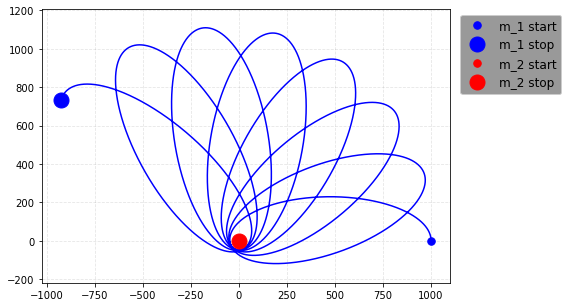

In [9]:
orbPlotter(positions, DL = True)